
# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

This dataset shows the data of movies and information about their cast, rating, production companies, movie budget and various other attributes. 
We want to find out:
- Actors with highest rating movies
- Production Companies with highest rating movies
- Do movies with high budgets recieve better rating than movies with low budgets
- Which genres have the highest ratings
- Which genre came out on top each year

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

#### Data Quality Issues

- [ ] ['cast', 'director', 'keywords', 'genres', 'production_companies']has missing values
- [x] release_date has str type instead of datetime
- [x] Drop ['imdb_id', 'homepage', 'tagline', 'keywords', 'overview'] columns.
- [x] there is one duplicate row 
- [x] Replace '0' with 'NaN' in ['revenue', 'budget', 'runtime', 'budget_adj', 'revenue_adj']


#### Data Tidiness 
- [x] Cast column has multiple values
- [x] Genres columns has multiple values
- [x] production_companies column has multiple values



### General Properties

In [4]:
# Load dataset into a dataframe
df = pd.read_csv('tmdb-movies.csv')

In [5]:
# Overview of dataframe
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
df_clean = df.copy()

### Data Cleaning

#### Drop unnecessary columns to analysis

In [25]:
d_col = ['imdb_id', 'homepage', 'tagline', 'keywords', 'overview']
df_clean.drop(d_col, axis=1, inplace=True)

####  Fix values sperated by '|' issue by formating them into lists

In [33]:
df_clean.cast = df.cast.str.split('|')

In [13]:
df_clean.genres = df_clean.genres.str.split('|')

In [21]:
df_clean.production_companies = df_clean.production_companies.str.split('|')

In [103]:
df_clean.director = df_clean.director.str.split('|')

#### Expand the lists into columns

In [43]:
# Expand cast into columns
cast = df_clean.cast.apply(pd.Series)
# Rename cast colunmns
cast = cast.rename(columns = lambda x : 'cast_' + str(x+1))

In [51]:
# Concatenate the 2 dataframes
df_clean = pd.concat([df_clean,cast], axis=1)

In [58]:
# Expand Genres into columns
genres = df_clean.genres.apply(pd.Series)
# Rename genres columns
genres = genres.rename(columns = lambda x : 'genre_' + str(x+1))

In [60]:
# Concatenate the 2 dataframes
df_clean = pd.concat([df_clean, genres], axis=1)

In [63]:
# Expand production_companies into columns
p_c = df_clean.production_companies.apply(pd.Series)
# Rename columns
p_c = p_c.rename(columns= lambda x : 'company_' + str(x+1))

In [65]:
# Concatenate the 2 dataframes
df_clean = pd.concat([df_clean, p_c], axis=1)

In [66]:
# get a list of column names
list(df_clean)

['id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'director',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj',
 'cast_1',
 'cast_2',
 'cast_3',
 'cast_4',
 'cast_5',
 'genre_1',
 'genre_2',
 'genre_3',
 'genre_4',
 'genre_5',
 'company_1',
 'company_2',
 'company_3',
 'company_4',
 'company_5']

In [69]:
# Rearrange columns
df_clean = df_clean[
['id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'cast_1',
 'cast_2',
 'cast_3',
 'cast_4',
 'cast_5',
 'director',
 'runtime',
 'genres',
 'genre_1',
 'genre_2',
 'genre_3',
 'genre_4',
 'genre_5',
 'production_companies',
 'company_1',
 'company_2',
 'company_3',
 'company_4',
 'company_5',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']
]

In [71]:
# drop columns with lists as data
df_clean.drop(['cast', 'genres', 'production_companies'], axis=1, inplace=True)

In [72]:
# check if columns are arranged and dropped
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast_1          10790 non-null  object 
 6   cast_2          10646 non-null  object 
 7   cast_3          10556 non-null  object 
 8   cast_4          10447 non-null  object 
 9   cast_5          10134 non-null  object 
 10  director        10822 non-null  object 
 11  runtime         10866 non-null  int64  
 12  genre_1         10843 non-null  object 
 13  genre_2         8515 non-null   object 
 14  genre_3         5079 non-null   object 
 15  genre_4         1981 non-null   object 
 16  genre_5         542 non-null    object 
 17  company_1       9836 non-null  

In [74]:
# change release_date column type to datetime
df_clean.release_date = pd.to_datetime(df_clean.release_date)

In [78]:
# show all columns
pd.set_option('display.max_columns', 28)

In [86]:
# check for duplicates
df_clean.duplicated().sum()

1

In [87]:
# Drop duplicate row
df_clean.drop_duplicates(inplace=True)

In [115]:
# Replace '0' with NaN in columnns
df_clean.revenue.replace(0, np.NAN, inplace=True)
df_clean.budget.replace(0, np.NAN, inplace=True)
df_clean.runtime.replace(0, np.NAN, inplace=True)
df_clean.revenue_adj.replace(0, np.NAN, inplace=True)
df_clean.budget_adj.replace(0, np.NAN, inplace=True)

In [122]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   popularity      10865 non-null  float64       
 2   budget          5169 non-null   float64       
 3   revenue         4849 non-null   float64       
 4   original_title  10865 non-null  object        
 5   cast_1          10789 non-null  object        
 6   cast_2          10645 non-null  object        
 7   cast_3          10555 non-null  object        
 8   cast_4          10446 non-null  object        
 9   cast_5          10133 non-null  object        
 10  director        10821 non-null  object        
 11  runtime         10834 non-null  float64       
 12  genre_1         10842 non-null  object        
 13  genre_2         8514 non-null   object        
 14  genre_3         5078 non-null   object        
 15  ge

In [121]:
df_clean.head(20)

,id,popularity,budget,revenue,original_title,cast_1,cast_2,cast_3,cast_4,cast_5,director,runtime,genre_1,genre_2,genre_3,genre_4,genre_5,company_1,company_2,company_3,company_4,company_5,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Colin Trevorrow,124.0,Action,Adventure,Science Fiction,Thriller,NaN,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,George Miller,120.0,Action,Adventure,Science Fiction,Thriller,NaN,Village Roadshow Pictures,Kennedy Miller Productions,NaN,NaN,NaN,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Robert Schwentke,119.0,Adventure,Science Fiction,Thriller,NaN,NaN,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,NaN,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,J.J. Abrams,136.0,Action,Adventure,Science Fiction,Fantasy,NaN,Lucasfilm,Truenorth Productions,Bad Robot,NaN,NaN,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,James Wan,137.0,Action,Crime,Thriller,NaN,NaN,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio,Tom Hardy,Will Poulter,Domhnall Gleeson,Paul Anderson,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156.0,Western,Drama,Adventure,Thriller,NaN,Regency Enterprises,Appian Way,CatchPlay,Anonymous Content,New Regency Pictures,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger,Jason Clarke,Emilia Clarke,Jai Courtney,J.K. Simmons,Alan Taylor,125.0,Science Fiction,Action,Thriller,Adventure,NaN,Paramount Pictures,Skydance Productions,NaN,NaN,NaN,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon,Jessica Chastain,Kristen Wiig,Jeff Daniels,Michael PeÃ±a,Ridley Scott,141.0,Drama,Adventure,Science Fiction,NaN,NaN,Twentieth Century Fox Film Corporation,Scott Free Productions,Mid Atlantic Films,International Traders,TSG Entertainment,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock,Jon Hamm,Michael Keaton,Allison Janney,Steve Coogan,Kyle Balda|Pierre Coffin,91.0,Family,Animation,Adventure,Comedy,NaN,Universal Pictures,Illumination Entertainment,NaN,NaN,NaN,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler,Phyllis Smith,Richard Kind,Bill Hader,Lewis Black,Pete Docter,94.0,Comedy,Animation,Family,NaN,NaN,Walt Disney Pictures,Pixar Animation Studios,Walt Disney Studios Motion Pictures,NaN,NaN,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Which genres are most popular from year to year?

In [134]:
# Create list of genres in dataset
genres = pd.unique(df_clean[['genre_1', 'genre_2', 'genre_3', 'genre_3', 'genre_4', 'genre_5']].values.ravel('K')).tolist()

In [149]:
len(genres)

21

> **Note**: Every movie in this dataset has more than one genre listed, so when calculating the average rating for each genre through the years movies may be calculated more than once accross different genres.

In [145]:
# Create list of release_years in dataset
years = df_clean.release_year.unique().tolist()

In [203]:
# Getting the average rating for each genre in each year listed in the dataset
# create list to store dicts in it which will be used later to construct a dataframe
years_list = []
# loop through each genre for each year
for year in years:
    temp_dict= {}
    temp_dict.update({'Year' : year})
    avg_rate = []
    temp_df = df_clean[df_clean.release_year == year]
    for genre in genres:
#       Get the average rating for each genre in each year
        temp1_df = temp_df[temp_df.genre_1 == genre]
        avg_rate.append(temp1_df.vote_average.mean())
        temp1_df = temp_df[temp_df.genre_2 == genre]
        avg_rate.append(temp1_df.vote_average.mean())
        temp1_df = temp_df[temp_df.genre_3 == genre]
        avg_rate.append(temp1_df.vote_average.mean())
        temp1_df = temp_df[temp_df.genre_4 == genre]
        avg_rate.append(temp1_df.vote_average.mean())
        temp1_df = temp_df[temp_df.genre_5 == genre]
        avg_rate.append(temp1_df.vote_average.mean())
#       Append list of dict where the key is the key is the genre and value is the average rate for each genre
        temp_dict.update({genre: np.nanmean(avg_rate)})
    years_list.append(temp_dict)


In [205]:
# Create a dataframe of each year and each genre average rating
year_genre_df = pd.DataFrame(years_list)

In [223]:
# Drop nan column
year_genre_df.drop(np.nan, axis=1, inplace=True)

In [224]:
year_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             56 non-null     int64  
 1   Action           56 non-null     float64
 2   Adventure        56 non-null     float64
 3   Western          56 non-null     float64
 4   Science Fiction  56 non-null     float64
 5   Drama            56 non-null     float64
 6   Family           56 non-null     float64
 7   Comedy           56 non-null     float64
 8   Crime            56 non-null     float64
 9   Romance          56 non-null     float64
 10  War              56 non-null     float64
 11  Mystery          56 non-null     float64
 12  Thriller         56 non-null     float64
 13  Fantasy          56 non-null     float64
 14  History          56 non-null     float64
 15  Animation        56 non-null     float64
 16  Horror           56 non-null     float64
 17  Music            5

In [226]:
year_genre_df

,Year,Action,Adventure,Western,Science Fiction,Drama,Family,Comedy,Crime,Romance,War,Mystery,Thriller,Fantasy,History,Animation,Horror,Music,Documentary,TV Movie,Foreign
0,2015,5.667830,5.833887,6.051758,6.020137,6.010789,6.092039,6.089792,6.070865,6.073456,6.084876,6.054229,6.019411,6.019237,6.048491,6.070349,6.006383,6.035249,6.067581,6.062360,6.062360
1,2014,6.246564,6.020051,5.998223,6.001323,5.993221,6.081321,6.139910,6.098711,6.118192,6.155106,6.128025,6.107857,6.119851,6.142278,6.191332,6.105528,6.118206,6.139459,6.123967,6.123967
2,1977,6.650000,6.540873,6.446786,6.349490,6.380079,6.435974,6.455457,6.458757,6.462881,6.431407,6.381567,6.347344,6.292475,6.299498,6.306529,6.269492,6.265119,6.278481,6.278481,6.278481
3,2009,5.912923,5.979953,5.979953,5.864602,5.963752,5.941454,5.915351,5.857387,5.880754,5.936226,5.904133,5.874240,5.887882,5.913488,5.949942,5.911518,5.910746,5.933692,5.958146,5.942033
4,2010,5.842133,6.177322,6.142714,5.852415,5.895067,5.904924,5.891521,5.914869,5.920496,5.991447,5.978493,5.958634,5.977696,6.061313,6.084201,6.017069,6.038106,6.056915,6.036536,6.024111
5,1999,5.857458,5.887744,5.780195,5.622918,5.706903,5.710609,5.737421,5.807580,5.825071,5.848784,5.899719,5.897055,5.894175,5.903773,5.934301,5.892867,5.928261,5.961138,5.968430,5.977818
6,2001,5.642708,5.644618,5.655694,5.485582,5.570320,5.624711,5.599133,5.659866,5.691965,5.744620,5.756878,5.756150,5.775988,5.804000,5.812125,5.793414,5.815391,5.830386,5.825237,5.821573
7,2008,5.339773,5.583232,5.631736,5.512735,5.579638,5.618732,5.642268,5.701592,5.744627,5.832073,5.844990,5.829843,5.804350,5.888302,5.893499,5.836996,5.889516,5.917534,5.895626,5.899119
8,2011,5.722271,5.992994,6.053358,5.934782,5.957945,6.016795,6.010776,6.046886,6.036515,6.032365,6.031614,5.984627,5.989044,5.993972,6.004565,5.967596,5.979290,6.021403,6.020301,6.046876
9,2002,5.944468,6.040686,6.158388,6.014440,6.041751,5.992603,5.972695,5.996626,5.996191,6.027351,6.028977,6.000109,6.015695,6.042355,6.049542,6.027826,6.060013,6.083378,6.052589,6.040041


In [233]:
# Setting 'year' column as index
year_genre_df = year_genre_df.set_index('Year')

In [239]:
year_genre_df.sort_index(inplace=True)

In [270]:
popular_genres = year_genre_df.idxmax(axis='columns')

In [272]:
unpopular_genres = year_genre_df.idxmin(axis='columns')

In [283]:
pop_genres = pd.DataFrame(popular_genres, columns=['Best Genre'])

In [284]:
pop_genres = pd.concat([pop_genres, pd.DataFrame(unpopular_genres, columns=['Worst Genre'])], axis=1)

In [285]:
pop_genres

,Best Genre,Worst Genre
Year,,
1960,Adventure,Action
1961,Mystery,Action
1962,Western,Adventure
1963,Adventure,Romance
1964,Action,Science Fiction
1965,Crime,Western
1966,Animation,Science Fiction
1967,Mystery,Science Fiction
1968,Adventure,Action


In [288]:
# Save dataframe as a csv file
pop_genres.to_csv('genres_popularity.csv')

In [389]:
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Most Liked Genres From 1960-2015')

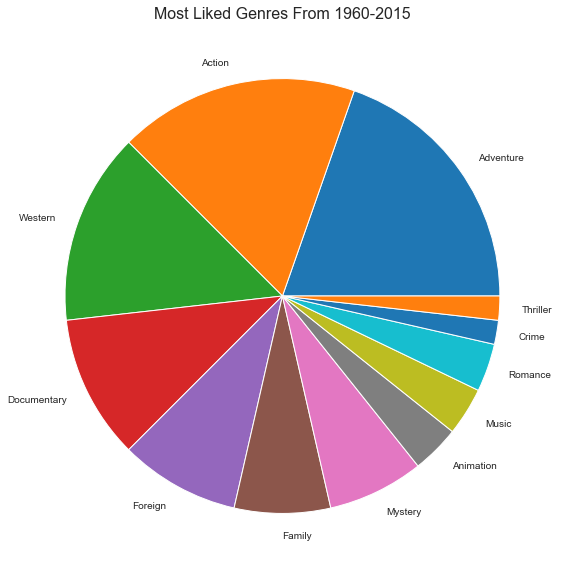

In [390]:
# plot a pie chart to show the most popular movies over the years
pop_genres['Best Genre'].value_counts().plot.pie(label='', figsize=(12,10))
plt.title('Most Liked Genres From 1960-2015', fontsize=16)

Text(0.5, 1.0, 'Least Liked Genres From 1960-2015')

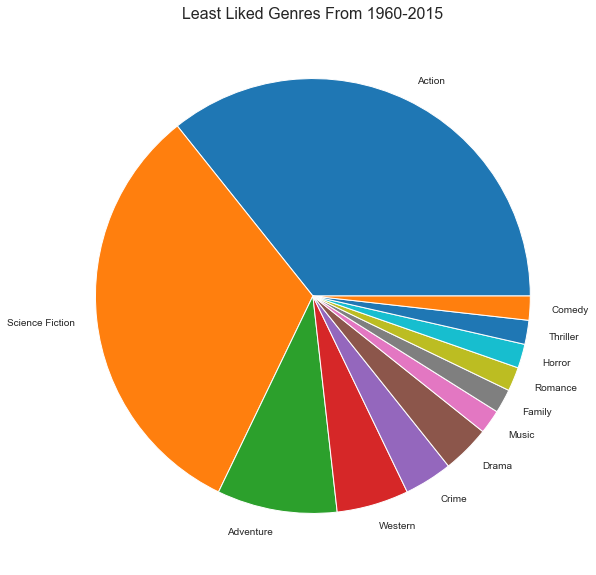

In [391]:
# plot a pie chart to show the most popular movies over the years
pop_genres['Worst Genre'].value_counts().plot.pie(label='', figsize=(12,10))
plt.title('Least Liked Genres From 1960-2015', fontsize=16)

### Research Question 2: What kinds of properties are associated with movies that have high revenues?

In [306]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   popularity      10865 non-null  float64       
 2   budget          5169 non-null   float64       
 3   revenue         4849 non-null   float64       
 4   original_title  10865 non-null  object        
 5   cast_1          10789 non-null  object        
 6   cast_2          10645 non-null  object        
 7   cast_3          10555 non-null  object        
 8   cast_4          10446 non-null  object        
 9   cast_5          10133 non-null  object        
 10  director        10821 non-null  object        
 11  runtime         10834 non-null  float64       
 12  genre_1         10842 non-null  object        
 13  genre_2         8514 non-null   object        
 14  genre_3         5078 non-null   object        
 15  ge

In [311]:
# drop rows where data about budget and revenue is nor available
revenue_df = df_clean[df_clean.budget_adj.notna() & df_clean.revenue_adj.notna()]

In [328]:
# suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.float_format = '{:,}'.format

In [329]:
revenue_df

,id,popularity,budget,revenue,original_title,cast_1,cast_2,cast_3,cast_4,cast_5,director,runtime,genre_1,genre_2,genre_3,genre_4,genre_5,company_1,company_2,company_3,company_4,company_5,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,"150,000,000.0","1,513,528,810.0",Jurassic World,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Colin Trevorrow,124.0,Action,Adventure,Science Fiction,Thriller,NaN,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu,2015-06-09,5562,6.5,2015,"137,999,939.280026","1,392,445,892.5238"
1,76341,28.419936,"150,000,000.0","378,436,354.0",Mad Max: Fury Road,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,George Miller,120.0,Action,Adventure,Science Fiction,Thriller,NaN,Village Roadshow Pictures,Kennedy Miller Productions,NaN,NaN,NaN,2015-05-13,6185,7.1,2015,"137,999,939.280026","348,161,292.489031"
2,262500,13.112507,"110,000,000.0","295,238,201.0",Insurgent,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Robert Schwentke,119.0,Adventure,Science Fiction,Thriller,NaN,NaN,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,NaN,2015-03-18,2480,6.3,2015,"101,199,955.47201899","271,619,025.407628"
3,140607,11.173103999999999,"200,000,000.0","2,068,178,225.0",Star Wars: The Force Awakens,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,J.J. Abrams,136.0,Action,Adventure,Science Fiction,Fantasy,NaN,Lucasfilm,Truenorth Productions,Bad Robot,NaN,NaN,2015-12-15,5292,7.5,2015,"183,999,919.040035","1,902,723,129.80182"
4,168259,9.335014,"190,000,000.0","1,506,249,360.0",Furious 7,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,James Wan,137.0,Action,Crime,Thriller,NaN,NaN,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films,2015-04-01,2947,7.3,2015,"174,799,923.08803302","1,385,748,801.47052"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,0.670273999999999,"7,500,000.0","33,736,689.0",Who's Afraid of Virginia Woolf?,Elizabeth Taylor,Richard Burton,George Segal,Sandy Dennis,Agnes Flanagan,Mike Nichols,131.0,Drama,NaN,NaN,NaN,NaN,Chenault Productions,NaN,NaN,NaN,NaN,2066-06-21,74,7.5,1966,"50,385,110.1922359","226,643,572.371492"
10828,5780,0.40273000000000003,"3,000,000.0","13,000,000.0",Torn Curtain,Paul Newman,Julie Andrews,Lila Kedrova,HansjÃ¶rg Felmy,Tamara Toumanova,Alfred Hitchcock,128.0,Mystery,Thriller,NaN,NaN,NaN,Universal Pictures,NaN,NaN,NaN,NaN,2066-07-13,46,6.3,1966,"20,154,044.0768943","87,334,190.99987571"
10829,6644,0.39566799999999996,"4,653,000.0","6,000,000.0",El Dorado,John Wayne,Robert Mitchum,James Caan,Charlene Holt,Paul Fix,Howard Hawks,120.0,Action,Western,NaN,NaN,NaN,Paramount Pictures,Laurel Productions,NaN,NaN,NaN,2066-12-17,36,6.9,1966,"31,258,922.3632632","40,308,088.1537887"
10835,5923,0.29991100000000004,"12,000,000.0","20,000,000.0",The Sand Pebbles,Steve McQueen,Richard Attenborough,Richard Crenna,Candice Bergen,Emmanuelle Arsan,Robert Wise,182.0,Action,Adventure,Drama,War,Romance,Twentieth Century Fox Film Corporation,Solar Productions,Robert Wise Productions,NaN,NaN,2066-12-20,28,7.0,1966,"80,616,176.3075775","134,360,293.84596202"


In [319]:
revenue_df.budget_adj.corr(revenue_df.revenue_adj)

0.5704510195812402

Text(0, 0.5, 'Revenue')

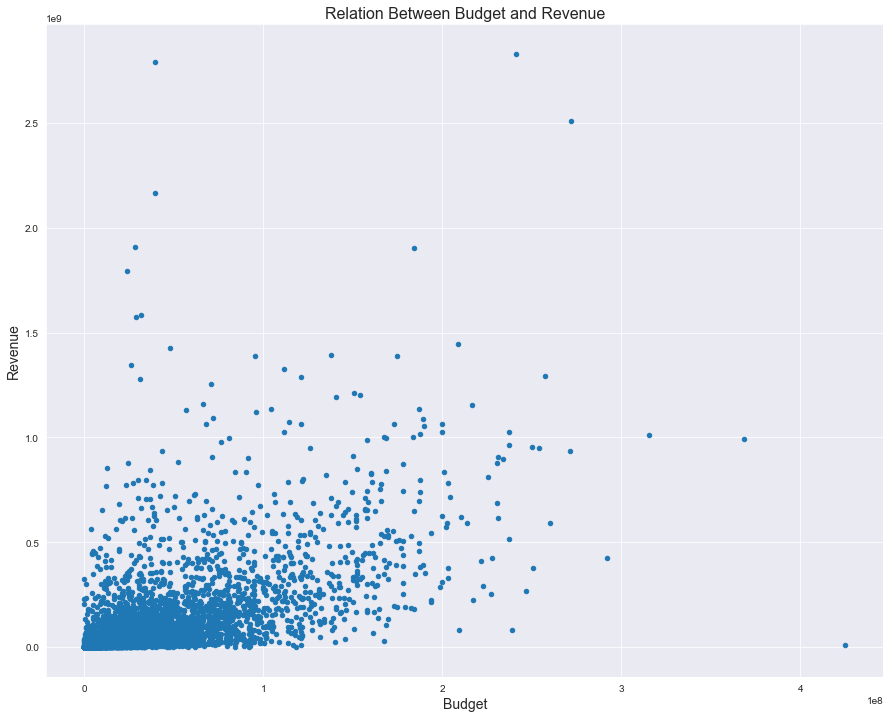

In [392]:
# Scatter plot to represent relatinship between budget and revenue of a movie
revenue_df.plot.scatter(x='budget_adj', y='revenue_adj', figsize=(15,12))
plt.title("Relation Between Budget and Revenue", fontsize=16)
plt.xlabel("Budget", fontsize=14)
plt.ylabel("Revenue", fontsize=14)

> **The above scatter plot and correlation of 0.5705 shows that amount spent on making a movie is somewhat correlated to the movie achieving high revenues**

In [332]:
revenue_df.revenue_adj.describe()

count                3,854.0
mean    137,064,690.30304146
std     216,111,351.44431075
min         2.37070528956505
25%     18,357,350.356732048
50%      61,730,679.07895175
75%       163,257,654.555831
max      2,827,123,750.41189
Name: revenue_adj, dtype: float64

In [342]:
# classifying movies into categories depending on their revenue
edges= [2.37070528956505, 18357350.356732048, 61730679.07895175, 163257654.555831, 2827123750.41189]
ratings =['Low', 'Below Average', 'Above Average', 'High']
# create a new column to store the movie category in
revenue_df['Movie_Rating'] = pd.cut(revenue_df.revenue_adj, bins=edges, labels=ratings)

<ipython-input-342-783556001afe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_df['Movie_Rating'] = pd.cut(revenue_df.revenue_adj, bins=edges, labels=ratings)


In [348]:
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3854 non-null   int64         
 1   popularity      3854 non-null   float64       
 2   budget          3854 non-null   float64       
 3   revenue         3854 non-null   float64       
 4   original_title  3854 non-null   object        
 5   cast_1          3850 non-null   object        
 6   cast_2          3846 non-null   object        
 7   cast_3          3846 non-null   object        
 8   cast_4          3838 non-null   object        
 9   cast_5          3816 non-null   object        
 10  director        3853 non-null   object        
 11  runtime         3854 non-null   float64       
 12  genre_1         3854 non-null   object        
 13  genre_2         3205 non-null   object        
 14  genre_3         2112 non-null   object        
 15  gen

In [371]:
properties_list= []
for rating in ratings:
    temp_df = revenue_df[revenue_df.Movie_Rating == rating]
    avg_runtime = temp_df.runtime.mean()
    avg_rating = temp_df.vote_average.mean()
    avg_budget = temp_df.budget_adj.mean()
    frequent_actor = temp_df.loc[:, 'cast_1':'cast_5'].stack().value_counts().idxmax()
    frequent_director = temp_df.director.value_counts().idxmax()
    frequent_genre = temp_df.loc[:, 'genre_1':'genre_5'].stack().value_counts().idxmax()
    prod_comp = temp_df.loc[:, 'company_1':'company_5'].stack().value_counts().idxmax()
    properties_list.append(
    {'Revenue_Bin' : rating,
     'Average_Runtime' : avg_runtime,
     'Average_Rate' : avg_rating,
     'Average_Budget' : avg_budget,
     'Frequent_Actor' : frequent_actor,
     'Frequent_Director' : frequent_director,
     'Frequent_Genre' : frequent_genre,
     'Production_Company' : prod_comp
    })
    

In [372]:
properties_df = pd.DataFrame(properties_list)

In [375]:
properties_df.round(2)

,Revenue_Bin,Average_Runtime,Average_Rate,Average_Budget,Frequent_Actor,Frequent_Director,Frequent_Genre,Production_Company
0,Low,103.22,5.96,"16,000,828.2",Willem Dafoe,Richard Linklater,Drama,Warner Bros.
1,Below Average,106.4,6.07,"29,470,726.03",Robert De Niro,Wes Craven,Drama,Universal Pictures
2,Above Average,109.6,6.19,"44,490,497.99",Robert De Niro,Clint Eastwood,Drama,Warner Bros.
3,High,117.66,6.46,"86,992,079.79",Tom Cruise,Steven Spielberg,Action,Warner Bros.


In [399]:
properties_df.to_csv('properties.csv')

### Research Question 3: What are the most produced genres over time?

In [395]:
# create a series of number of movies produced in each genre
prod_gen= df_clean.loc[:, 'genre_1':'genre_2'].stack().value_counts()

Text(0, 0.5, 'Number of Movies')

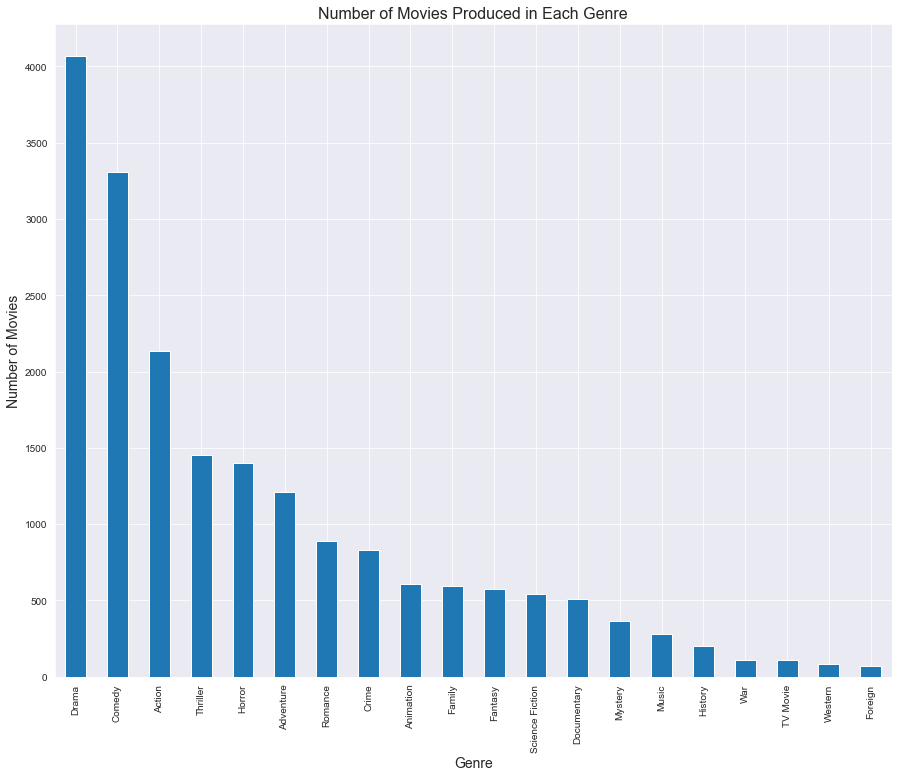

In [398]:
# Plot a bar chart showing number of movies in each genre
prod_gen.plot.bar(figsize=(15,12))
plt.title('Number of Movies Produced in Each Genre', fontsize=16)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('Number of Movies',fontsize=14)

<a id='conclusions'></a>
## Conclusions

> **Note**: Every movie in this dataset has more than one genre listed, so when calculating the any average for each genre through the years movies may be calculated more than once accross different genres.

**In the first part of the analysis I attempted to find the most popular genres from year to year. The results of the analysis were based on the average vote by users for each genre. It showed over the years people favored action and  adventure movies. It is note worthy that western movies was close to them and that is due to low amount of movies produced in that particular genre.**

**In the second part of the analysis I wanted to find properties associated with high revenue. I questioned wether if spending more on the movie will yield higher revenue. I found out that this is somewhat true, as the correlation between these two variables where close to 0.5. Other factors that affect the revenues such as director, genre or the presence of a certain actor in the cast that attracts people to see the movie.**

**The last part examined the number of movies produced over the years. This was to give a sense on how the numbers of movies relate to the whole analysis.** 
